In [1]:
#import library
import numpy as np
import pandas as pd

In [2]:
# import dataset

dt = pd.read_csv('titanic.csv')
dt.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [3]:
dt.shape

(891, 11)

In [4]:
# Xóa các cột
df=dt.drop(['PassengerId', 'Name', 'Ticket'],axis=1)
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [5]:
# Kiểm tra null
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

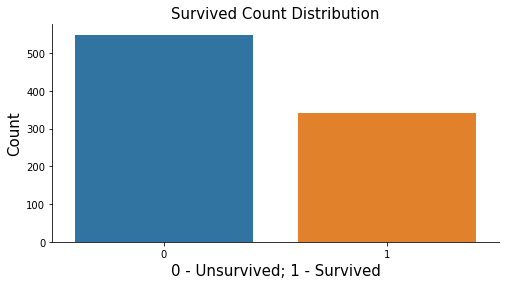

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.countplot(x = 'Survived', data = df)
ax.set_xlabel('0 - Unsurvived; 1 - Survived', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Survived Count Distribution', fontsize=15)
sns.despine()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

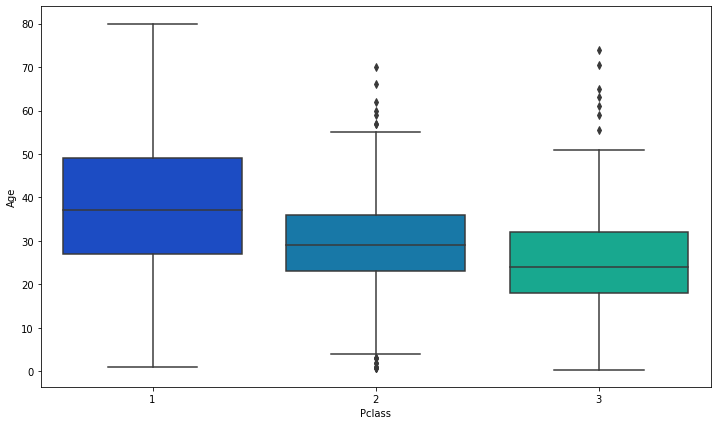

In [7]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [9]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [10]:
df.dtypes # datatypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [11]:
#import LabelEncoder để chuyển giá trị chuỗi thành giá trị số 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

features = ["Sex", "Embarked"]

for col in features:
    df[col] = le.fit_transform(df[col])

df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,1,27.0,0,0,13.00,2
887,1,1,0,19.0,0,0,30.00,2
888,0,3,0,24.0,1,2,23.45,2
889,1,1,1,26.0,0,0,30.00,0
890,0,3,1,32.0,0,0,7.75,1


In [12]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

X.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,2,1,27.0,0,0,13.00,2
887,1,0,19.0,0,0,30.00,2
888,3,0,24.0,1,2,23.45,2
889,1,1,26.0,0,0,30.00,0
890,3,1,32.0,0,0,7.75,1


In [13]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 10)

In [14]:
# Decision Tree Classifier with criterion gini index
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=5,  random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [15]:
import joblib
filename = "model.joblib"
joblib.dump(model, filename)

['model.joblib']

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred_gini = model.predict(X_test)

print(f'Model accuracy score with criterion gini index: {accuracy_score(y_test, y_pred_gini)* 100:.2f}%')

Model accuracy score with criterion gini index: 79.48%


In [17]:
from sklearn.metrics import mean_squared_error

print(f'MSE: {mean_squared_error(y_test, y_pred_gini):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gini)):.2f}')

model.predict([[3, 1, 32, 0, 0, 7.75, 1]])

MSE: 0.21
RMSE: 0.45


array([0], dtype=int64)

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(max_depth = 5).fit(X_train,y_train)

print(f'Model accuracy score is: {rfr.score(X_test, y_test)* 100:.2f}%')
print("RMSE :", np.sqrt(mean_squared_error(y_test,rfr.predict(X_test))))

Model accuracy score is: 82.84%
RMSE : 0.41429674273976147


In [19]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

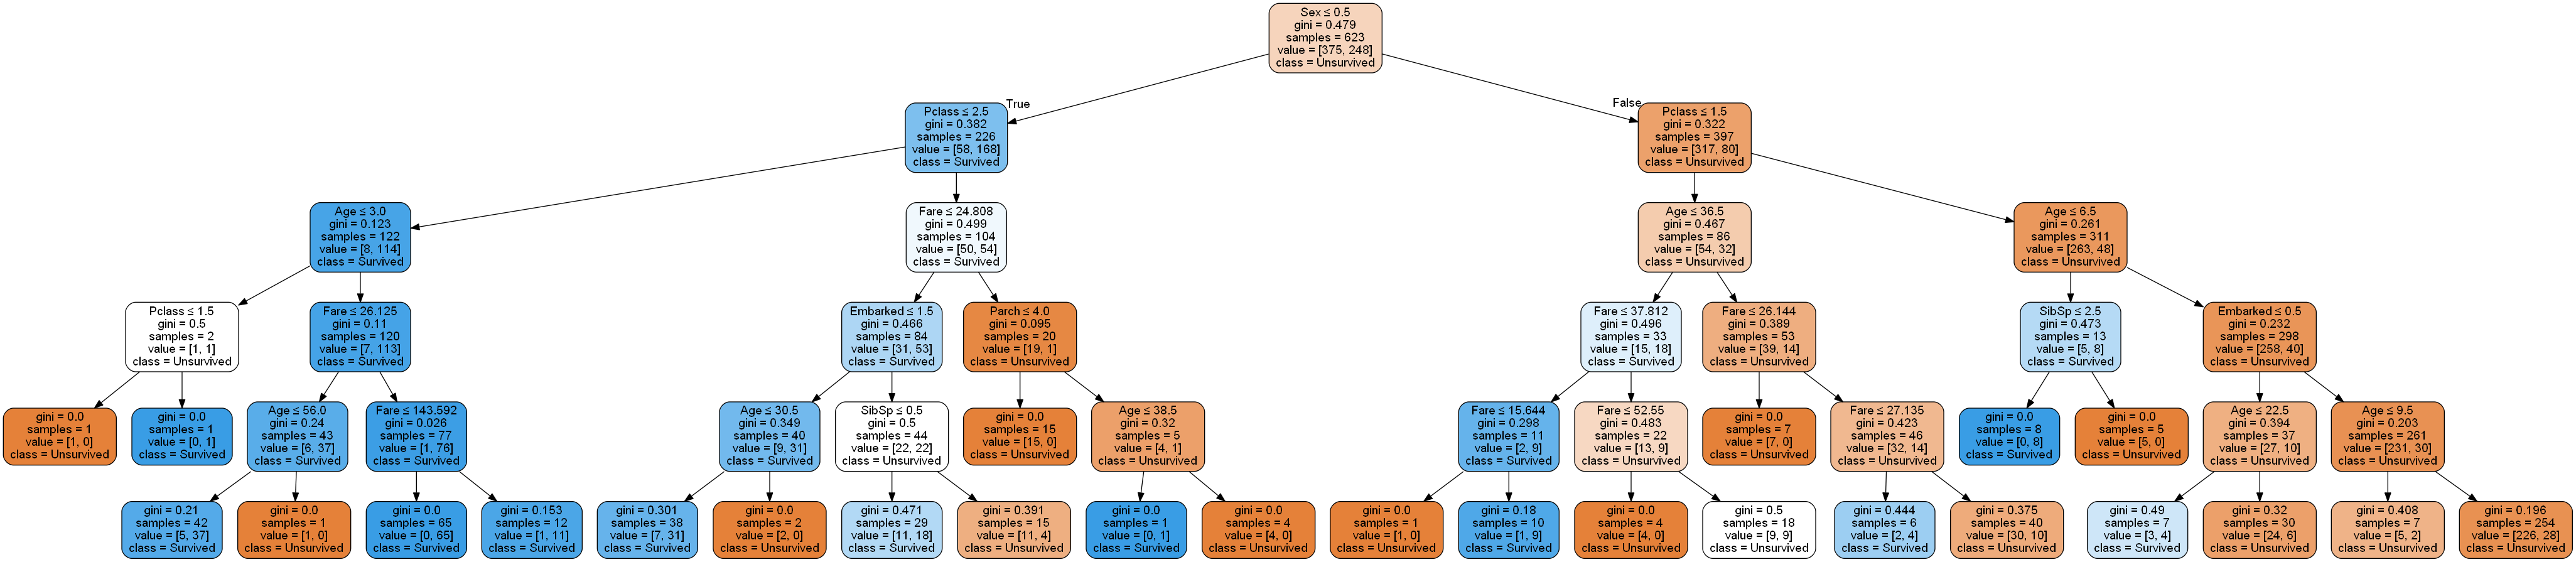

In [20]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = X.columns,class_names=['Unsurvived','Survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())

In [21]:
# Decision Tree Classifier with criterion entropy
# Create Decision Tree classifer object
model1 = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)

# Train Decision Tree Classifer
model1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_entropy = model1.predict(X_test)

In [22]:
# Model Accuracy
print(f'Model accuracy score with criterion entropy index: {accuracy_score(y_test, y_pred_entropy)* 100:.2f}%')
print(f'MSE: {mean_squared_error(y_test, y_pred_entropy):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_entropy)):.2f}')

model.predict([[3, 1, 32, 0, 0, 7.75, 1]])

Model accuracy score with criterion entropy index: 81.34%
MSE: 0.19
RMSE: 0.43


array([0], dtype=int64)

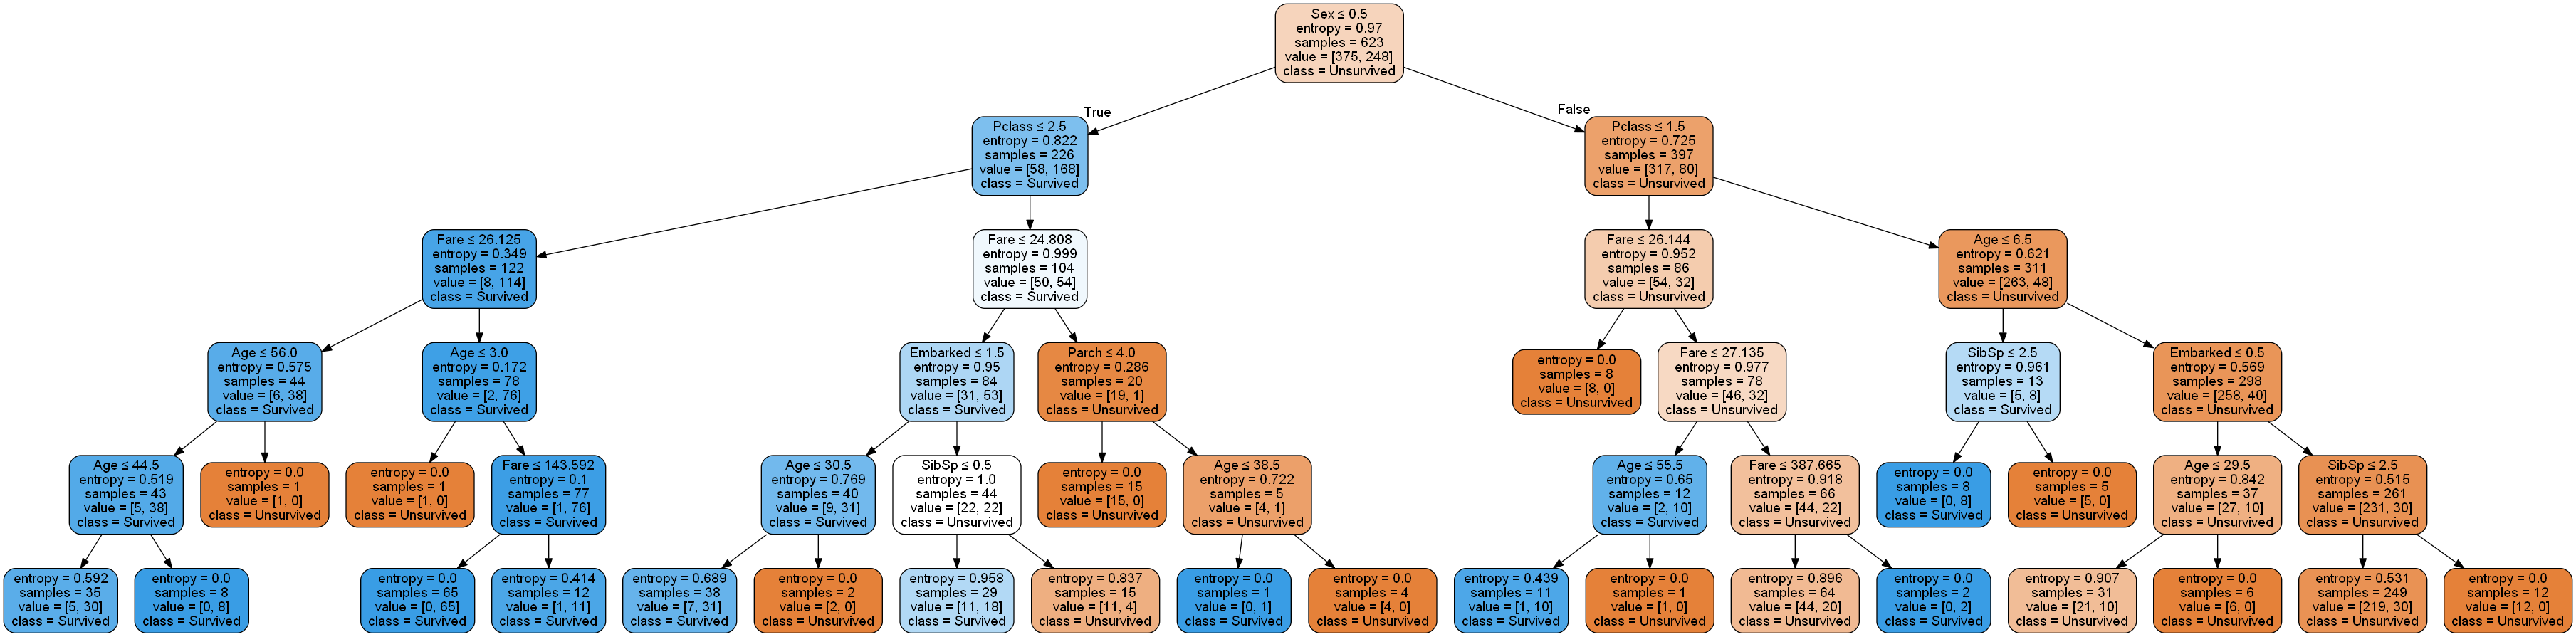

In [23]:
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = X.columns,class_names=['Unsurvived','Survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic1.png')
Image(graph.create_png())